<a href="https://colab.research.google.com/github/ehcacao/Pynthon/blob/master/aula02_allura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2201]:
#carregando o Pandas
import pandas as pd

#carregando a planilha de dados
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.shape
len(avaliacoes)
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

#fazendo um grupo com as medias dos filmes
notas_media_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

#Colocar as medias em filmes
filmes_com_media = filmes.join(notas_media_por_filme, on="filmeId")

#Mostas em ordem descrescente
filmes_com_media.sort_values("nota", ascending=False).head(15)

#carregar graficos matplot
import matplotlib.pyplot as plt

filmes_avaliados = filmes_com_media.query("nota in @notas_media_por_filme")
filmes_nao_avaliados = filmes_com_media.query("nota not in @notas_media_por_filme")
#Precisa determinar quantos filmes não foram avaliados, verificando o tamanho desse DataFrame
print("Quantidade de filmes não Avaliados:", len(filmes_nao_avaliados))

filmes_com_media.columns = [coluna for coluna in filmes_com_media.columns[0:len(filmes.columns)]] + ["media"]

filmes_com_media["media"] = [float("%.2f" %media) for media in filmes_com_media["media"]]

Quantidade de filmes não Avaliados: 18


In [2202]:
filmes["genero"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2203]:
filmes["genero"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [2204]:
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

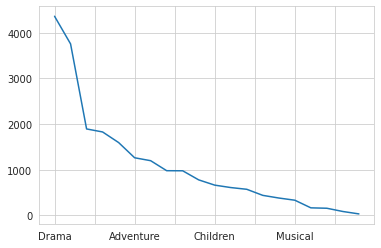

In [2205]:
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

<function matplotlib.pyplot.show>

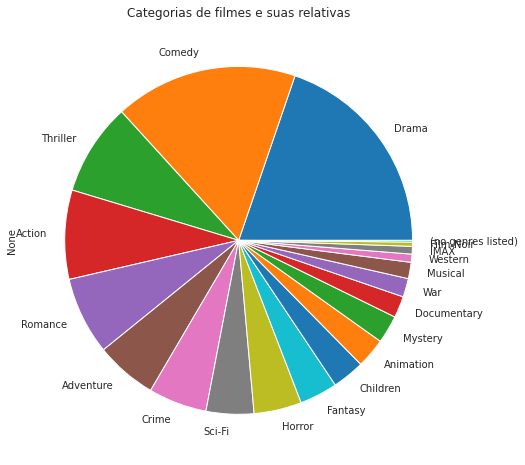

In [2206]:
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie',
    title='Categorias de filmes e suas relativas',
    figsize=(8,8))
plt.show

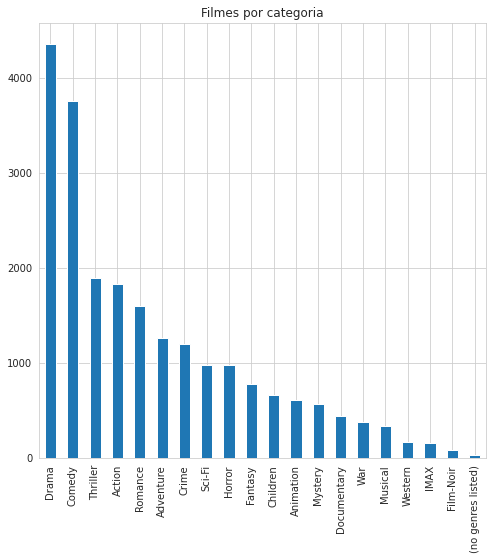

In [2207]:
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

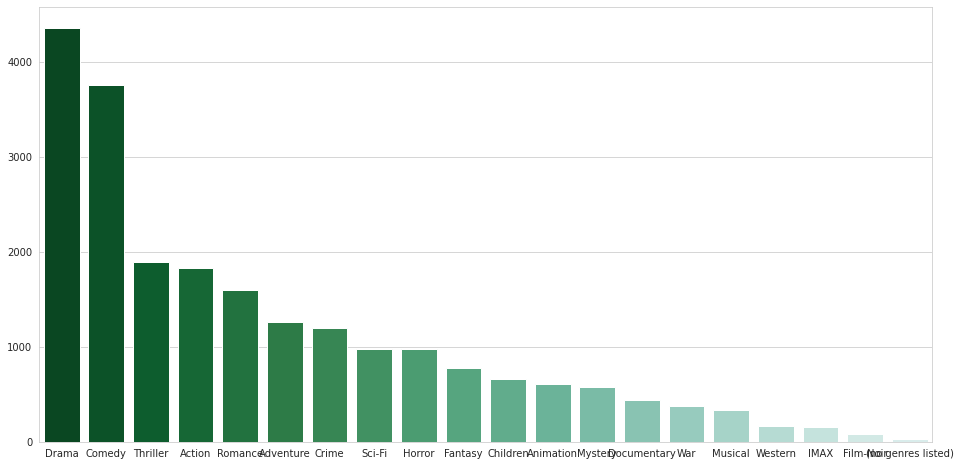

In [2208]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

In [2209]:
filmes_com_media.head()

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


3.9209302325581397


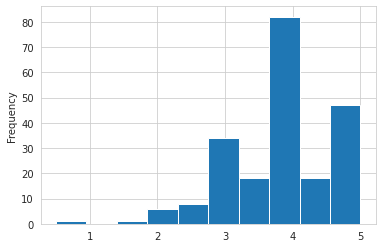

In [2210]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


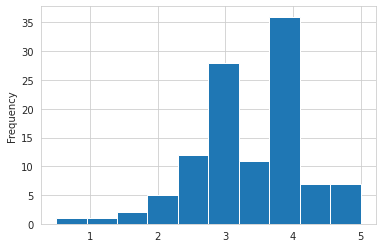

In [2211]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

In [2212]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

KeyError: ignored

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

In [0]:
#Magico de Oz
plot_filme(919)

In [0]:
plot_filme(46578)

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

In [0]:
plot_filme(46578)

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x = "filmeId", y="nota")

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [500,1345,4254,6124]"), x = "filmeId", y="nota")

## Desafio 1

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
graf = sns.barplot(x=filmes_por_genero.index,
                   y=filmes_por_genero.values,
                   palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4)
                   )
graf.set_xticklabels(
    graf.get_xticklabels(),
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.show()

## Desafio 2

In [0]:
filmes_com_media.sort_values("nota", ascending=False)[4800:4870].head(20)


In [0]:
plot_filme(63062)

In [0]:
plot_filme(53125)

In [0]:
plot_filme(58299)

In [0]:
plot_filme(5630)

In [0]:
plot_filme(78574)

## Desafio 3

In [0]:
soma_de_avaliacoes_filme = avaliacoes.groupby("filmeId").size()
#trocar o nome media por votos
soma_de_avaliacoes_filme.name = "Votos"
filmes_com_media = filmes_com_media.join(soma_de_avaliacoes_filme, on="filmeId")
top_filmes = filmes_com_media.sort_values("Votos", ascending=False)[0:15]
plt.figure(figsize=(25,6))
plt.title("Nota dos filmes mais votados Top 15", fontdict={'fontweight':'bold','fontsize':16})
plt.xticks(rotation=55)
sns.boxplot(data = avaliacoes.query("filmeId in [356,318,296,593,2571,260,480,110,589,527,2859,1,1196,50,2858]"), x = "filmeId", y="nota")
plt.show()

plt.figure(figsize=(25,6))
plt.title("Número de votos dos 15 filmes mais votados", fontdict={'fontweight':'bold','fontsize':16})
plt.xticks(rotation=45)
sns.barplot(x="titulo", y="Votos", data = top_filmes, palette="BuGn_r")
plt.show()


Aqui acho que ouve uma interpretação "minha" errada dos dados, se era para apresentar o números de votos, é melhor colocar o nome dos filmes para saber qual filme foi mais votado.

## Desafio 4

In [0]:
filmes_com_media = avaliacoes.merge(filmes, on="filmeId", how="outer")
filmes_com_media.head()

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(data = filmes_com_media.query("filmeId in [1,2,919,46578]"), x="titulo", y="nota")
plt.title("Último Boxplot da Aula 02")
plt.xticks(rotation=45)
plt.show()


## Desafio 5

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
import scipy
estatisticas = avaliacoes.groupby('filmeId')['nota'].agg(['mean', 'median', lambda x: scipy.stats.mode(x)[0]])
estatisticas.columns = ['media', 'mediana', 'moda']
filmes_estatisticas = filmes.join(estatisticas, on='filmeId')
filmes_estatisticas

In [0]:
notas_prox_1 = avaliacoes[avaliacoes.nota < 1.5]['nota']
notas_prox_1.describe()

In [0]:
notas_prox_1.hist()

In [0]:
notas_prox_3 = avaliacoes[avaliacoes.nota > 1.5][avaliacoes.nota < 3.5]['nota']
notas_prox_3.describe()

In [0]:
notas_prox_3.hist()

In [0]:
notas_prox_5 = avaliacoes[avaliacoes.nota > 4]['nota']
notas_prox_5.describe()

In [0]:
notas_prox_5.hist()

## Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
def plot_filme_lado_a_lado(n):
  fig = plt.figure(figsize=(8,8))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist', ax=ax1)
  sns.boxplot(data = notas_do_filme, ax=ax2)

plot_filme_lado_a_lado(1)

## Desafio 7

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [2213]:
titulo_filmes = filmes['titulo']
titulo_filmes.head()
string_ano = titulo_filmes.str.extract(r'(?P<letter>[(])(?P<ano>\d\d\d\d)(?P<letter2>[)])')
print(string_ano)
ano_filmes = string_ano['ano']
print(ano_filmes)
filmes_com_ano = filmes_com_media.join(ano_filmes)
media_ano = filmes_com_ano.groupby('ano').media.mean()

plt.figure(figsize=(19,8))
media_ano.barplot()
plt.ylabel('Media')
plt.show()

     letter   ano letter2
0         (  1995       )
1         (  1995       )
2         (  1995       )
3         (  1995       )
4         (  1995       )
...     ...   ...     ...
9737      (  2017       )
9738      (  2017       )
9739      (  2017       )
9740      (  2018       )
9741      (  1991       )

[9742 rows x 3 columns]
0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: ano, Length: 9742, dtype: object


AttributeError: ignored

<Figure size 1368x576 with 0 Axes>